# MULTIPLE LINEAR REGRESSION

### Task :
* Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

### Exploratory Data Analysis (EDA) - Data Exploration and Preprocessing

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data

In [26]:
df = pd.read_csv("./ToyotaCorolla - MLR.csv")

In [27]:
df1 = df.copy()

In [28]:
df1.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


#### Data types and null values info

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


#### -> no null values

#### Renaming column age

In [30]:
df1.rename(columns={'Age_08_04': 'Age'}, inplace=True)

#### Descriptive statistics for numeric columns

In [31]:
df1.describe()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


#### categorical column

In [32]:
df1.describe(include='object')

,Fuel_Type
count,1436
unique,3
top,Petrol
freq,1264


### Check for duplicates

In [34]:
df1.duplicated().sum()

1

In [35]:
df1[df1.duplicated(keep=False)]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
112,24950,8,13253,Diesel,116,0,2000,5,4,5,1320
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


###  Dropping duplicates

In [36]:
df2 = df1.drop_duplicates()

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1435 non-null   int64 
 1   Age        1435 non-null   int64 
 2   KM         1435 non-null   int64 
 3   Fuel_Type  1435 non-null   object
 4   HP         1435 non-null   int64 
 5   Automatic  1435 non-null   int64 
 6   cc         1435 non-null   int64 
 7   Doors      1435 non-null   int64 
 8   Cylinders  1435 non-null   int64 
 9   Gears      1435 non-null   int64 
 10  Weight     1435 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 134.5+ KB


In [39]:
df2 = df2.reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1435 non-null   int64 
 1   Age        1435 non-null   int64 
 2   KM         1435 non-null   int64 
 3   Fuel_Type  1435 non-null   object
 4   HP         1435 non-null   int64 
 5   Automatic  1435 non-null   int64 
 6   cc         1435 non-null   int64 
 7   Doors      1435 non-null   int64 
 8   Cylinders  1435 non-null   int64 
 9   Gears      1435 non-null   int64 
 10  Weight     1435 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.4+ KB


In [40]:
cols = df2.columns
for col in cols:
    print(f"Column {col}: {df2[col].nunique()}")

Column Price: 236
Column Age: 77
Column KM: 1263
Column Fuel_Type: 3
Column HP: 12
Column Automatic: 2
Column cc: 13
Column Doors: 4
Column Cylinders: 1
Column Gears: 4
Column Weight: 59


In [50]:
df2['Cylinders'].value_counts()

Cylinders
4    1435
Name: count, dtype: int64

### NOTE: 
Column Cylinders has constant value "4",it won't contribute any useful information to the model because it has zero variance and no relationship with the dependent variable. So better to drop it.

In [51]:
df2.drop(columns='Cylinders', inplace=True)

In [52]:
df2.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170


In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1435 non-null   int64 
 1   Age        1435 non-null   int64 
 2   KM         1435 non-null   int64 
 3   Fuel_Type  1435 non-null   object
 4   HP         1435 non-null   int64 
 5   Automatic  1435 non-null   int64 
 6   cc         1435 non-null   int64 
 7   Doors      1435 non-null   int64 
 8   Gears      1435 non-null   int64 
 9   Weight     1435 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.2+ KB


### Automating EDA process

In [43]:
import ydata_profiling as pp

In [54]:
report = pp.ProfileReport(df2)

In [55]:
report.to_file(output_file='eda_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1000.79it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### The report shows high correlation between many features.

## Visualizing the data

### Univariate Analysis -  Histogram plot

In [56]:
%matplotlib inline

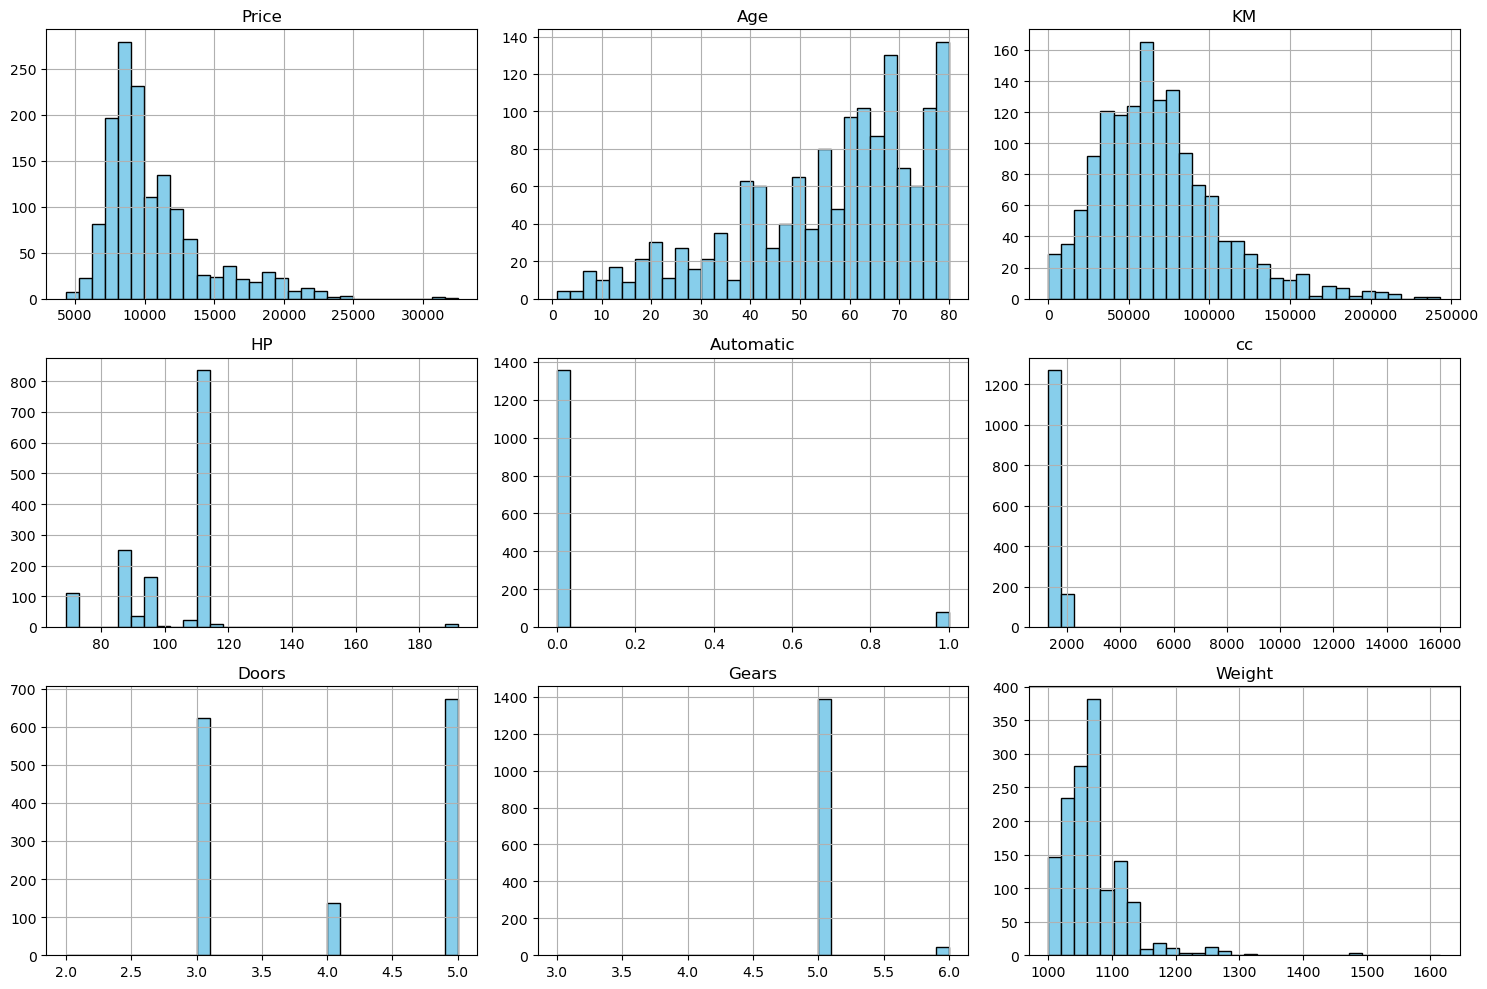

In [57]:
df2.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

### Interpretation of Histograms

Several features like Price, KM, CC, and Weight are right-skewed and may require transformation before modeling.

Variables like Automatic and Gears are highly imbalanced.

Outliers are present in features like Price, KM, CC, and HP.


### Bivariate Analysis 

<Figure size 1000x800 with 0 Axes>

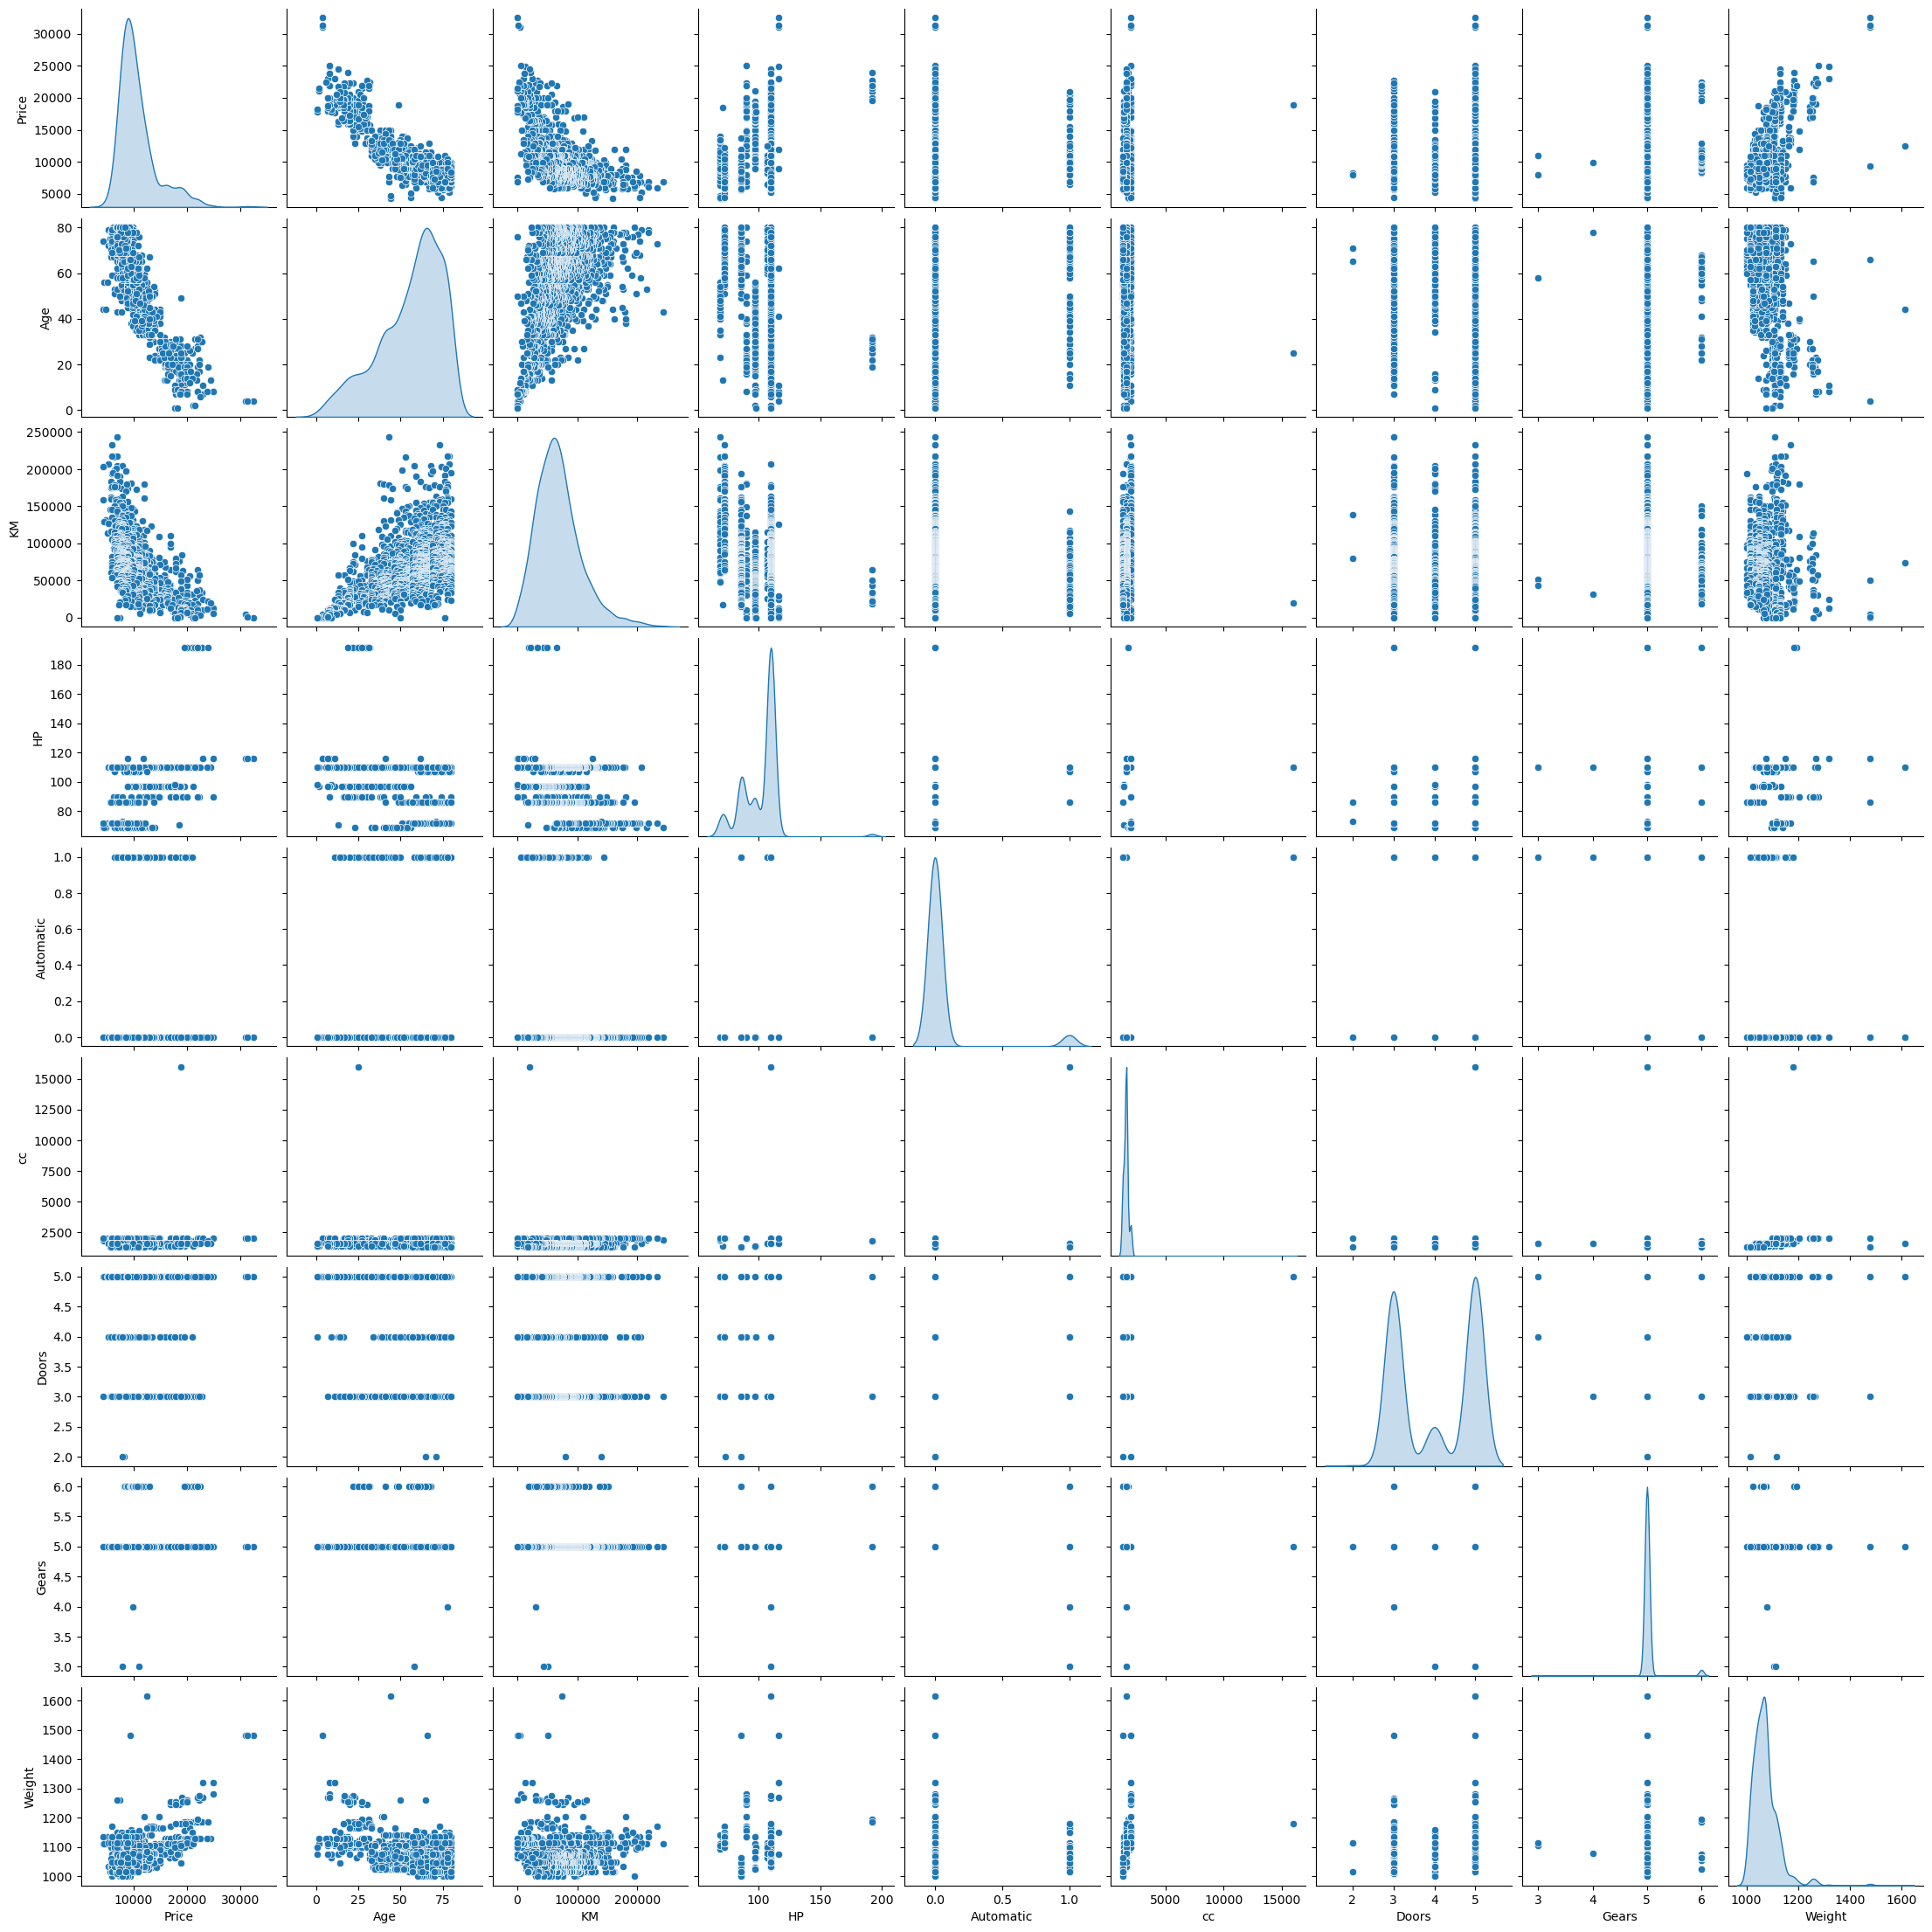

In [75]:
plt.figure(figsize=(10, 8))
sns.pairplot(df2, diag_kind='kde')  
plt.show()

#### From the pairplot:
Price vs Age:
There is a clear negative relationship between the Age of the car and its Price. As the car gets older, the price tends to decrease.

Price vs KM:
There’s a weak negative relationship between KM driven and Price — higher KM tends to lower the price, though it’s not as strong as Age.

Price vs HP, Weight:
Both Horsepower (HP) and Weight show a slight positive correlation with Price. Cars with higher HP and higher weight generally tend to have higher prices.

Distribution of Variables:

Price, KM, cc, and Weight distributions are right-skewed with some extreme outliers visible.

Age is roughly normally distributed with a peak around 70-80 months.

HP has a multi-modal distribution, indicating discrete groupings in horsepower ratings.

Automatic, Doors, Gears are categorical/discrete — visible as vertical/horizontal stripes in the scatter plots.

Multicollinearity Indicators:

Age and KM have a mild positive relationship (as expected — older cars are typically driven more).

HP and Weight show slight correlation.

Other variables seem fairly independent.

Strongest predictors for Price appear to be Age, KM, HP, and Weight.


## Boxplot for outlier detection 

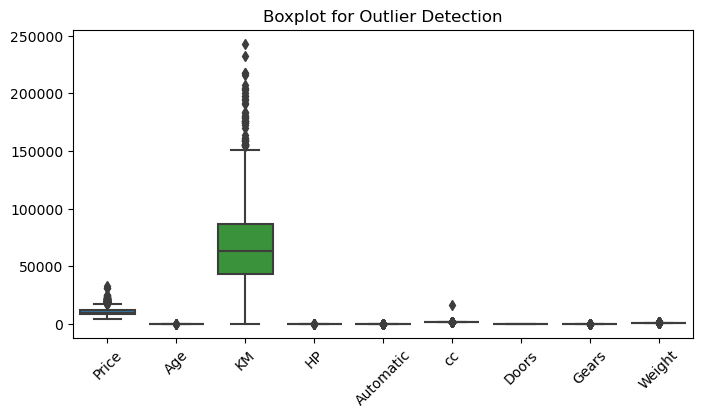

In [68]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df2)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

#### Features Fare, Age, SibSp and Parch seem to have outliers.
Outlier detection is not strictly necessary for this Titanic dataset, especially since outliers are valid observations reflecting the diversity of passengers.

In [69]:
from scipy.stats import iqr

### Function to detect and remove outliers

In [1]:
def remove_outliers_iqr(data2, cols, factor=1.5):
    mask = pd.Series(True, index=data2.index)
    for col in cols:
        Q1 = data2[col].quantile(0.25)
        Q3 = data2[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        mask &= data2[col].between(lower, upper)
    return data2[mask]

In [94]:
numeric_cols = df2.select_dtypes(include=['int64', 'float64']).columns
data_cleaned = remove_outliers_iqr(df2, numeric_cols)

In [95]:
print(f"Rows before outlier removal: {df2.shape[0]}, after: {data_cleaned.shape[0]}")

Rows before outlier removal: 1435, after: 1098


### Correlation Analysis

In [96]:
corr_matrix = data_cleaned.corr(numeric_only = True)
corr_matrix

,Price,Age,KM,HP,Automatic,cc,Doors,Gears,Weight
Price,1.000000,-0.867168,-0.531257,0.111864,NaN,0.109523,0.178103,NaN,0.472660
Age,-0.867168,1.000000,0.468104,0.011544,NaN,-0.066002,-0.102536,NaN,-0.388867
KM,-0.531257,0.468104,1.000000,-0.046861,NaN,0.142423,0.010608,NaN,-0.030156
HP,0.111864,0.011544,-0.046861,1.000000,NaN,0.592455,0.170784,NaN,0.308100
Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,0.109523,-0.066002,0.142423,0.592455,NaN,1.000000,0.218468,NaN,0.617273
Doors,0.178103,-0.102536,0.010608,0.170784,NaN,0.218468,1.000000,NaN,0.535303
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,0.472660,-0.388867,-0.030156,0.308100,NaN,0.617273,0.535303,NaN,1.000000


### Correlation Heatmap (Multicollinearity Check for MLR)

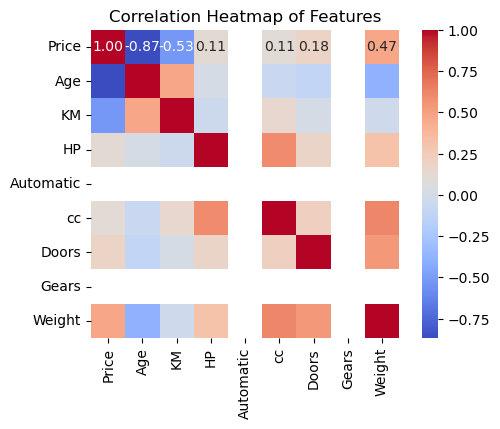

In [97]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Features")
plt.show()

### Interpretation of Correlation Heatmap:
Price vs Age: -0.88 → strong negative correlation (as car age increases, price drops)

Price vs KM: -0.57 → moderate negative correlation (as KM increases, price drops)

Price vs HP: +0.31 → weak positive correlation (higher HP, higher price)

Price vs Weight: +0.58 → moderate positive correlation (heavier cars tend to cost more)

Price vs Automatic: +0.03 → negligible (almost no relationship)

Price vs Gears: +0.06 → negligible

Other correlations among features are mostly weak 

In [98]:
cols = data_cleaned.columns
for col in cols:
    print(f"Column {col}: {data_cleaned[col].nunique()}")

Column Price: 171
Column Age: 65
Column KM: 986
Column Fuel_Type: 3
Column HP: 5
Column Automatic: 1
Column cc: 9
Column Doors: 4
Column Gears: 1
Column Weight: 37


#### NOTE: Better to drop columns gear and automatic

In [99]:
data_cleaned['Gears'].value_counts()

Gears
5    1098
Name: count, dtype: int64

In [100]:
data_cleaned.drop(columns=['Gears'], inplace=True)

In [101]:
data_cleaned['Automatic'].value_counts()

Automatic
0    1098
Name: count, dtype: int64

In [102]:
data_cleaned.drop(columns=['Automatic'], inplace=True)

In [103]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1098 entries, 9 to 1434
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1098 non-null   int64 
 1   Age        1098 non-null   int64 
 2   KM         1098 non-null   int64 
 3   Fuel_Type  1098 non-null   object
 4   HP         1098 non-null   int64 
 5   cc         1098 non-null   int64 
 6   Doors      1098 non-null   int64 
 7   Weight     1098 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 77.2+ KB


In [225]:
skewness = df1['cc'].skew()
print(f"Skewness of cc: {skewness}")

Skewness of cc: 27.431792795981686


In [224]:
skewness = data_cleaned['cc'].skew()
print(f"Skewness of cc: {skewness}")

Skewness of cc: -0.29538056106676375


#### -> Skewness of cc features handles well through outlier removal

### Encoding categorical column - Fuel Type - Using onehot encoder

In [104]:
data_cleaned.head()

,Price,Age,KM,Fuel_Type,HP,cc,Doors,Weight
9,12950,23,71138,Diesel,69,1900,3,1105
18,16750,24,25563,Petrol,110,1600,3,1065
19,16950,30,64359,Petrol,110,1600,3,1105
20,15950,30,67660,Petrol,110,1600,3,1105
22,15950,28,56349,Petrol,110,1600,3,1120


In [106]:
df_encoded = pd.get_dummies(data_cleaned, columns=['Fuel_Type'], drop_first=True)
df_encoded.head()

,Price,Age,KM,HP,cc,Doors,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
9,12950,23,71138,69,1900,3,1105,True,False
18,16750,24,25563,110,1600,3,1065,False,True
19,16950,30,64359,110,1600,3,1105,False,True
20,15950,30,67660,110,1600,3,1105,False,True
22,15950,28,56349,110,1600,3,1120,False,True


### Scale the data

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
num_cols = ['Age', 'KM', 'HP', 'cc', 'Weight']

In [109]:
scaler = StandardScaler()

In [110]:
df_scaled = df_encoded.copy()

In [111]:
df_scaled[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [112]:
df_scaled.head()

,Price,Age,KM,HP,cc,Doors,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
9,12950,-2.288994,0.184006,-3.052238,2.762203,3,1.683106,True,False
18,16750,-2.224668,-1.453622,0.683134,0.581673,3,0.290637,False,True
19,16950,-1.838717,-0.059581,0.683134,0.581673,3,1.683106,False,True
20,15950,-1.838717,0.059032,0.683134,0.581673,3,1.683106,False,True
22,15950,-1.967368,-0.347401,0.683134,0.581673,3,2.205282,False,True


### Model Building

## Model 1

### Split the data

In [113]:
X = df_scaled.iloc[:,1:]
y = df_scaled.iloc[:,0]

In [114]:
X.head()

,Age,KM,HP,cc,Doors,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
9,-2.288994,0.184006,-3.052238,2.762203,3,1.683106,True,False
18,-2.224668,-1.453622,0.683134,0.581673,3,0.290637,False,True
19,-1.838717,-0.059581,0.683134,0.581673,3,1.683106,False,True
20,-1.838717,0.059032,0.683134,0.581673,3,1.683106,False,True
22,-1.967368,-0.347401,0.683134,0.581673,3,2.205282,False,True


In [115]:
y.head()

9     12950
18    16750
19    16950
20    15950
22    15950
Name: Price, dtype: int64

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [118]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((878, 8), (220, 8), (878,), (220,))

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
model = LinearRegression()

In [121]:
model.fit(X_train,y_train)

LinearRegression()

### coefficients of the model 

In [133]:
coefficients = model.coef_
intercept = model.intercept_

In [134]:
# DataFrame for better display
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

In [135]:
print(f"Intercept: {intercept}")
print(coef_df)

Intercept: 9925.176744819788
            Feature   Coefficient
0               Age  -1731.111293
1                KM   -377.769258
2                HP  -1548.550791
3                cc   1433.794612
4             Doors    -86.926435
5            Weight    643.538546
6  Fuel_Type_Diesel -10124.411041
7  Fuel_Type_Petrol    735.834328


### Interpretation of Model Coefficients

Intercept (9925.18):
This represents the predicted car price when all independent variables are zero. While this value doesn't have a direct practical interpretation (since features like age or weight cannot be zero), it serves as a baseline constant for the regression equation.

Age (-1731.11):
For each additional year of the car’s age, the price is expected to decrease by approximately 1731.11 units, keeping other variables constant.

KM (-377.77):
For every additional unit increase in the kilometers driven, the car price decreases by 377.77 units, assuming other factors remain unchanged.

HP (-1548.55):
Each additional unit increase in horsepower leads to a decrease of 1548.55 units in price, holding other variables constant. This suggests in your dataset, higher horsepower vehicles may depreciate more.

cc (+1433.79):
For every additional unit increase in engine cubic capacity, the car’s price increases by 1433.79 units, all else being equal.

Doors (-86.93):
Each additional door in a car decreases its price by 86.93 units, holding other factors constant. This might indicate door count isn’t a strong driver of price in this dataset.

Weight (+643.54):
For every unit increase in the car’s weight, the price increases by 643.54 units, keeping other variables constant.

Fuel_Type_Diesel (-10124.41):
Compared to the baseline category (likely CNG or another fuel type not shown in the dummy variables), diesel cars are priced lower by 10124.41 units, holding other variables constant.

Fuel_Type_Petrol (+735.83):
Compared to the baseline fuel type, petrol cars have a price higher by 735.83 units, all else being equal.

In [136]:
# Predict with training data
yhat_train = model.predict(X_train)

In [75]:
#yhat_train

### Model Evaluation

### Training metrics

In [123]:
from sklearn.metrics import mean_squared_error, r2_score

In [125]:
mse = mean_squared_error(y_train, yhat_train)
r2 = r2_score(y_train, yhat_train)

In [129]:
print("For training:")
print(f'MSE: {mse}')
print(f'R² Score: {r2}')

For training:
MSE: 1000982.2754340735
R² Score: 0.8152059830426889


### Testing metrics

In [124]:
yhat_test = model.predict(X_test)

In [127]:
mse_test = mean_squared_error(y_test, yhat_test)
r2_test = r2_score(y_test, yhat_test)

In [130]:
print("For testing:")
print(f'MSE: {mse_test}')
print(f'R² Score: {r2_test}')

For testing:
MSE: 962887.7658821444
R² Score: 0.8354072203180043


### Model performance 
The R² score for both training and testing sets is above 0.81, indicating that the model explains more than 81% of the variance in car prices based on the selected independent variables. The relatively small difference in R² scores between the training and testing sets also suggests that the model generalizes well to unseen data and is not overfitting.

The Mean Squared Error values are reasonably consistent between training and testing, confirming the model's predictive stability.

### rebuild with statsmodels OLS- for detailed regression diagnostics

In [138]:
import statsmodels.api as sm

In [140]:
# Add constant (intercept) to model
X_train_sm = sm.add_constant(X_train)

In [145]:
# Ensure numeric dtype
X_train_sm = X_train_sm.astype(float)
y_train = y_train.astype(float)

In [146]:
ols_model = sm.OLS(y_train, X_train_sm).fit()

In [147]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     479.2
Date:                Thu, 19 Jun 2025   Prob (F-statistic):          1.79e-312
Time:                        17:55:02   Log-Likelihood:                -7311.3
No. Observations:                 878   AIC:                         1.464e+04
Df Residuals:                     869   BIC:                         1.468e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9925.1767    363.501     27.304      0.000    9211.735    1.06e+04
Age              -1731.1113     46.564    -37.177      0.000   -1822.503   -1639.720
KM                -377.7693     41.642     -9.072      0.000    -459.499    -296.039
HP               -1548.5508    409.253     -3.784      0.000   -2351.791    -745.310
cc                1433.7946    392.824      3.650      0.000     662.801    2204.789
Doors              -86.9264     43.949     -1.978      0.048    -173.184      -0.669
Weight             643.5385     58.678     10.967      0.000     528.371     758.706
Fuel_Type_Diesel -1.012e+04   2414.333     -4.193      0.000   -1.49e+04   -5385.806
Fuel_Type_Petrol   735.8343    334.392      2.201      0.028      79.524    1392.144
==============================================================================
Omnibus:                        7.551   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.023   Jarque-Bera (JB):               10.096
Skew:                          -0.063   Prob(JB):                      0.00642
Kurtosis:                       3.510   Cond. No.                         320.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation of Model 1 :

The OLS regression model built on the full dataset shows a reasonably strong fit, with an R² value of 0.815 and an adjusted R² of 0.814. This means the model explains about 81.5% of the variability in car prices indicating good predictive ability.

#### Key coefficient interpretations:

Age: The coefficient is -1731.11, meaning for each additional year of car age, the price decreases by around 1731 units, holding other variables constant.
KM: With a coefficient of -377.77, each unit increase in mileage reduces the car’s price by approximately 378 units.
HP (Horsepower): Price decreases by 1548.55 units for each additional unit of horsepower.
cc (Engine Capacity): A positive relationship of 1433.79 units — higher engine capacity increases car price.
Doors: Small negative impact (-86.93 units) — more doors slightly reduce car price.
Weight: For every additional unit increase in car weight, price increases by 643.54 units, indicating a strong positive relationship.
Fuel\_Type\_Diesel: Compared to the baseline category (likely CNG or another fuel type), diesel cars are priced lower by 10124.41 units.
Fuel\_Type\_Petrol: Petrol cars are priced 735.83 units higher than the baseline.

#### Model Diagnostics:

Prob(F-statistic) = 1.79e-312 — very close to zero, indicating the model as a whole is highly statistically significant.
Durbin-Watson = 1.988 — very close to 2, suggesting no serious autocorrelation in residuals.
Omnibus and Jarque-Bera tests have p-values less than 0.05 (Omnibus p = 0.023, JB p = 0.0064), indicating mild deviation from normality in residuals.
Condition Number = 320 — slightly high, which suggests potential multicollinearity. This should be confirmed via VIF values.


This initial model performs well, explaining a substantial portion of price variability. However, some issues like potential outliers (as shown by diagnostic tests) and multicollinearity (indicated by the condition number) suggest there’s room to improve the model by addressing these concerns — which is precisely what was attempted in subsequent models.


In [158]:
### Calculate residuals (difference between actual and predicted)
residuals = y_train - ols_model.fittedvalues

### Residual analysis with QQ plot and residual plot

In [160]:
import scipy.stats as stats

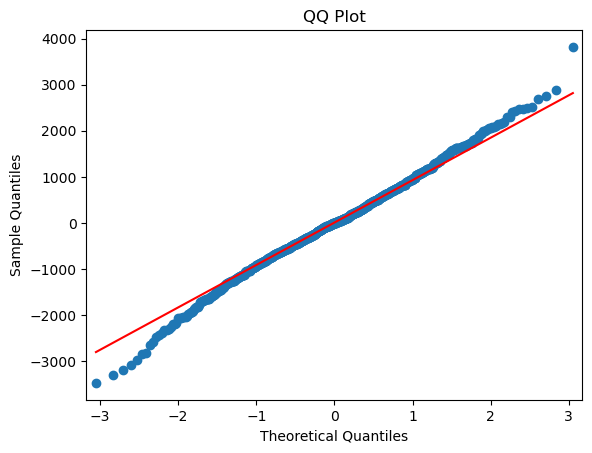

In [227]:
# QQ Plot for normality
sm.qqplot(residuals, line='q')
plt.title("QQ Plot")
plt.show()


### QQ Plot Interpretation:

Residuals are roughly normal. Slight tail deviations exist but are generally tolerable for multiple linear regression.



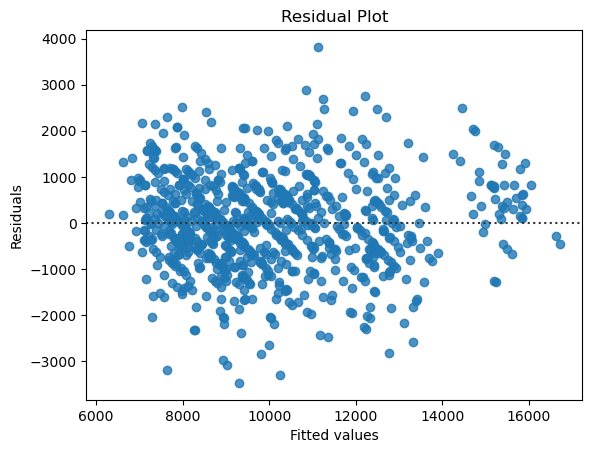

In [230]:
# Residual plot for homoscedasticity
sns.residplot(x=ols_model.fittedvalues, y=residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### Residual Plot Interpretation:

The residual plot displays residuals on the y-axis against the fitted values on the x-axis. Ideally, for a good regression model, residuals should be randomly scattered around zero with no clear pattern. However, in this plot, the residuals show a distinct pattern and the spread of the residuals increases as the fitted values increase. This indicates the presence of heteroscedasticity, meaning that the variance of the residuals is not constant. This violates another key assumption of linear regression and may suggest that the model is not adequately capturing the variability in the data.

## Model 2

In [ ]:
import statsmodels.api as sm

In [ ]:
# Ensure all data is numeric (fix for object/bool columns)
df_scaled = df_scaled.astype(float)

In [ ]:
# Split features and target
X = df_scaled.drop(columns=['Price'])
y = df_scaled['Price']

In [ ]:
# Add constant for intercept
X_const = sm.add_constant(X)

In [ ]:
# Fit OLS model
model = sm.OLS(y, X_const).fit()

### Cook's distance

In [ ]:
# Get influence metrics
influence = model.get_influence()
(cooks_d, p) = influence.cooks_distance

### Plot Cook's Distance

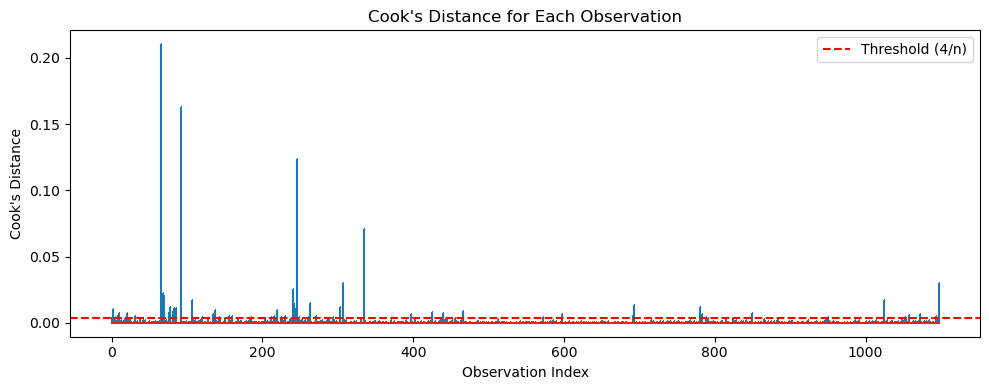

In [186]:
plt.figure(figsize=(10, 4))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.axhline(4 / len(X), color='red', linestyle='--', label='Threshold (4/n)')
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance for Each Observation")
plt.legend()
plt.tight_layout()
plt.show()


In [187]:
# Identify influential points
threshold = 4 / len(X)
influential_points = np.where(cooks_d > threshold)[0]
print(f"Number of influential points: {len(influential_points)}")
print("Influential indices:", influential_points)

Number of influential points: 66
Influential indices: [   1    2    3    5    9   10   21   31   66   68   70   76   77   82
   83   85   86   92  106  120  135  137  143  156  160  168  185  203
  212  215  219  225  230  241  242  243  244  246  248  261  263  271
  287  294  303  307  335  397  425  440  466  572  598  692  693  780
  783  789  849  950 1024 1053 1058 1072 1094 1097]


### Drop Influential Observations

In [188]:
# Drop influential points from df_scaled
df_cleaned = df_scaled.drop(df_scaled.iloc[influential_points].index).reset_index(drop=True)

In [189]:
# Rebuild OLS model after removing influential points
X_cleaned = df_cleaned.drop(columns=['Price'])
y_cleaned = df_cleaned['Price']

In [190]:
X_const_cleaned = sm.add_constant(X_cleaned)
model_cleaned = sm.OLS(y_cleaned, X_const_cleaned).fit()

In [192]:
model_cleaned.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     757.5
Date:                Thu, 19 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:11:06   Log-Likelihood:                -8435.8
No. Observations:                1032   AIC:                         1.689e+04
Df Residuals:                    1023   BIC:                         1.693e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9700.0288    353.235     27.461      0.000    9006.881    1.04e+04
Age              -1673.7010     38.290    -43.711      0.000   -1748.837   -1598.565
KM                -367.1352     33.244    -11.044      0.000    -432.369    -301.901
HP               -1335.2119    358.146     -3.728      0.000   -2037.997    -632.427
cc                1178.1386    344.481      3.420      0.001     502.168    1854.109
Doors              -74.1749     36.794     -2.016      0.044    -146.376      -1.974
Weight             721.7569     50.302     14.349      0.000     623.051     820.463
Fuel_Type_Diesel -8206.3309   2150.693     -3.816      0.000   -1.24e+04   -3986.057
Fuel_Type_Petrol   893.2105    339.093      2.634      0.009     227.814    1558.607
==============================================================================
Omnibus:                        3.503   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                3.482
Skew:                           0.114   Prob(JB):                        0.175
Kurtosis:                       2.830   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

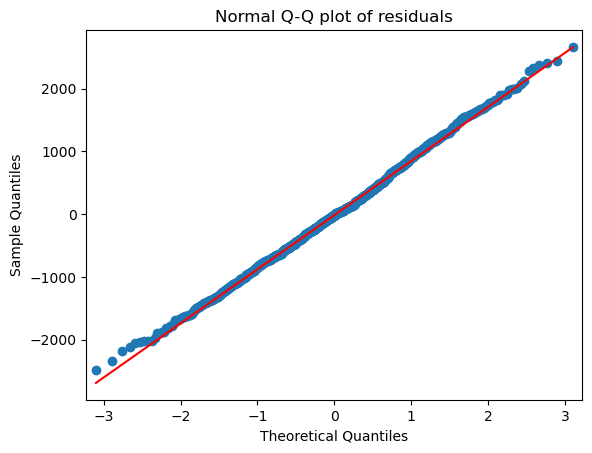

In [226]:
qqplot=sm.qqplot(model_cleaned.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

### Interpretation of Model 2 (After Removing Influential Points):

The OLS regression model built after removing influential points shows improved performance, with an R² value of 0.856 and an adjusted R² of 0.854. This means the model explains around 85.6% of the variation in car prices, indicating a strong fit.

Key coefficient interpretations:
Age: The coefficient is -1673.70, meaning for every additional year of car age, the price decreases by approximately 1674 units, holding other factors constant.

KM: With a coefficient of -367.14, higher mileage reduces the car price by about 367 units per unit increase in KM.

HP (Horsepower): The price decreases by 1335.21 units for each additional unit of horsepower.

cc (Engine Capacity): A positive effect of 1178.14 units on price for each unit increase in engine capacity.

Doors: Slight negative effect (-74.17 units), suggesting cars with more doors tend to be slightly less expensive.

Weight: A strong positive relationship — for every additional unit increase in car weight, the price increases by 721.76 units.

Fuel_Type_Diesel: Decreases price by 8206.33 units compared to the baseline fuel type.

Fuel_Type_Petrol: Increases price by 893.21 units relative to the baseline.

Model Diagnostics:
Prob(F-statistic) = 0.000 indicates the overall model is statistically significant.

Durbin-Watson = 1.935 suggests no serious autocorrelation in residuals.

Omnibus and Jarque-Bera test p-values are not significant (p > 0.05), indicating residuals are approximately normally distributed.

Condition Number = 360 — high values may hint at potential multicollinearity, so it’s important to check VIF values alongside this.

After removing influential points, the model’s fit and explanatory power improved notably compared to the first model. Coefficient signs and significance remain consistent, suggesting reliable relationships. The model appears statistically sound and suitable for prediction.

### Variance Inflation Factor (VIF) to detect multicollinearity 

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [193]:
X1 = X.astype(float)
y1 = y.astype(float)

In [194]:
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns
vif_data["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif_data

,feature,VIF
0,Age,1.903576
1,KM,1.427717
2,HP,134.174024
3,cc,123.966953
4,Doors,24.666610
5,Weight,3.041983
6,Fuel_Type_Diesel,104.754703
7,Fuel_Type_Petrol,27.233383


### Based on the calculated VIF values:

Age (1.90), KM (1.42), and Weight (3.04) have low VIF values, indicating no multicollinearity issues and can be safely retained in the model.

HP (134), Fuel_Type_Diesel	(104.754703) and cc (123.96) have extremely high VIF values, indicating severe multicollinearity. These variables are highly correlated and can distort the regression coefficients. It is advisable to remove one or both of these variables from the model.

Doors (24.67) and Fuel_Type_Petrol (27.23) also show high VIF values, suggesting potential multicollinearity. These variables should be considered for removal or further investigation.


## Model 3

In [214]:
# Select features with acceptable VIF values
selected_features = ['Age', 'KM', 'Weight']

In [215]:
X3 = df_cleaned[selected_features]
y3 = df_cleaned['Price']

In [216]:
# Train-test split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [217]:
# Build and fit the model
model3 = LinearRegression()
model3.fit(X3_train, y3_train)

LinearRegression()

In [218]:
# Predictions
y3_train_pred = model3.predict(X3_train)
y3_test_pred = model3.predict(X3_test)

In [219]:
# Performance metrics
train_mse3 = mean_squared_error(y3_train, y3_train_pred)
train_r2_3 = r2_score(y3_train, y3_train_pred)

In [220]:
test_mse3 = mean_squared_error(y3_test, y3_test_pred)
test_r2_3 = r2_score(y3_test, y3_test_pred)

In [221]:
# Coefficients
coefficients3 = pd.DataFrame({'Feature': selected_features, 'Coefficient': model3.coef_})

In [222]:
print("Intercept:", model3.intercept_)
print(coefficients3)
print("\nTrain MSE:", train_mse3, "Train R²:", train_r2_3)
print("Test MSE:", test_mse3, "Test R²:", test_r2_3)


Intercept: 10099.5553847116
  Feature  Coefficient
0     Age -1641.005278
1      KM  -388.892805
2  Weight   531.821393

Train MSE: 741840.1691021833 Train R²: 0.8541234988468952
Test MSE: 868286.2707728642 Test R²: 0.8322259028148902


### Interpretation :
Model 3:
After addressing multicollinearity by excluding variables with a VIF greater than 10, the final model was trained using only Age, KM, and Weight as predictors.

The intercept indicates the baseline price when all predictors are zero (which may not have practical meaning but is mathematically required).

Age has a negative coefficient, meaning older cars have lower prices.

KM also negatively affects price — higher mileage reduces the price.

Weight has a positive relationship with price.

This model shows a reasonable trade-off between simplicity and predictive power, achieving an R² of ~0.85 on training and 0.83 testing data.

### Lasso and Ridge regression

In [196]:
from sklearn.linear_model import Lasso, Ridge

In [201]:
df_cleaned.head(2)

,Price,Age,KM,HP,cc,Doors,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,12950.0,-2.288994,0.184006,-3.052238,2.762203,3.0,1.683106,1.0,0.0
1,15950.0,-1.967368,-0.347401,0.683134,0.581673,3.0,2.205282,0.0,1.0


In [203]:
X3 = df_cleaned.iloc[:,1:]
y3 = df_cleaned['Price']

# Train-test split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)


## Model 4

### Lasso Regression

In [210]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X3_train, y3_train)

Lasso(alpha=0.1)

In [211]:
# Predictions
lasso_train_pred = lasso_model.predict(X3_train)
lasso_test_pred = lasso_model.predict(X3_test)

In [212]:
# Metrics
print("Lasso Regression:")
print("Train MSE:", mean_squared_error(y3_train, lasso_train_pred))
print("Train R²:", r2_score(y3_train, lasso_train_pred))
print("Test MSE:", mean_squared_error(y3_test, lasso_test_pred))
print("Test R²:", r2_score(y3_test, lasso_test_pred))


Lasso Regression:
Train MSE: 710910.6404096306
Train R²: 0.860205525159173
Test MSE: 846506.3633425736
Test R²: 0.8364343124476254


#### Interpretation:

The Lasso Regression model shows a good fit with an R² of 0.8602 on the training data and 0.8364 on the test data, indicating that around 86% of the variance in car prices is explained by the model on the training set and around 83.6% on unseen data. The MSE values are 710,910 for training and 846,506 for testing, which indicates a reasonable prediction error.

In [213]:
# Coefficients
print("\nCoefficients:")
for feature, coef in zip(X3.columns, lasso_model.coef_):
    print(f"{feature}: {coef}")


Coefficients:
Age: -1668.2185791312338
KM: -364.55835868882264
HP: -1166.1336825945516
cc: 1010.5136440495882
Doors: -96.22689064213407
Weight: 718.9244452565243
Fuel_Type_Diesel: -7111.234239505918
Fuel_Type_Petrol: 1021.2734033236201


#### The coefficients show how much the price is expected to change with a one-unit increase in each variable, keeping others constant:

Age has a coefficient of -1668.21, meaning for every additional year, the car price decreases by approximately 1668 units.

KM has a coefficient of -364.56, meaning cars driven more have lower prices.

HP (horsepower) positively influences price, and with a negative coefficient of -1166.13, higher HP surprisingly lowers the price here — possibly because of multicollinearity effects or dataset characteristics.

cc has a positive effect of 1010.51, meaning higher engine capacity increases price.

Doors has a negligible negative effect (-96.23) on price.

Weight has a strong positive effect of 718.92, meaning heavier cars are priced higher.

Fuel_Type_Diesel reduces the price by 7111.23 units compared to the baseline.

Fuel_Type_Petrol increases the price by 1021.27 units compared to the baseline.

## Model 5

### Ridge Regression

In [206]:
# Fit Ridge
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X3_train, y3_train)

Ridge(alpha=0.1)

In [207]:
# Predictions
ridge_train_pred = ridge_model.predict(X3_train)
ridge_test_pred = ridge_model.predict(X3_test)

In [208]:
# Metrics
print("\nRidge Regression:")
print("Train MSE:", mean_squared_error(y3_train, ridge_train_pred))
print("Train R²:", r2_score(y3_train, ridge_train_pred))
print("Test MSE:", mean_squared_error(y3_test, ridge_test_pred))
print("Test R²:", r2_score(y3_test, ridge_test_pred))


Ridge Regression:
Train MSE: 712802.615015968
Train R²: 0.8598334845939162
Test MSE: 849480.4167189487
Test R²: 0.8358596527564645


### Interpreation:
The Ridge Regression model shows good predictive performance with an R² of 0.8598 on the training data and 0.8358 on the test data, indicating the model explains around 86% of the variance in car prices on the training set and around 83.6% on unseen data. The MSE values are 712,803 for training and 849,480 for testing, reflecting a reasonable level of prediction error.

In [209]:
# Coefficients
print("\nCoefficients:")
for feature, coef in zip(X3.columns, ridge_model.coef_):
    print(f"{feature}: {coef}")



Coefficients:
Age: -1650.1429294550403
KM: -361.1853785460285
HP: -721.0854673343475
cc: 583.2505066674493
Doors: -88.25659989909968
Weight: 705.8068722974523
Fuel_Type_Diesel: -4370.529040108038
Fuel_Type_Petrol: 1058.7535230584326


#### The coefficients represent the estimated effect of each predictor on the car price while controlling for other variables:

Age has a coefficient of -1650.14, suggesting car price decreases by about 1650 units for each additional year of age.

KM has a coefficient of -361.19, indicating higher mileage reduces car price.

HP has a coefficient of -721.09, meaning an increase in horsepower reduces price, though the effect is smaller than in the Lasso model — Ridge tends to shrink large coefficients but keeps all variables.

cc (engine capacity) has a positive coefficient of 583.25, increasing price.

Doors has a small negative effect (-88.26) on price.

Weight has a strong positive effect of 705.81, indicating heavier cars are priced higher.

Fuel_Type_Diesel reduces the price by 4370.53 units relative to the baseline.

Fuel_Type_Petrol increases the price by 1058.75 units compared to the baseline.

### Interview Questions:

### 1. What is Normalization & Standardization and how is it helpful?

Normalization:
Normalization rescales the data to a fixed range, usually between 0 and 1.

Formula:
(X - Xmin) / (Xmax - Xmin)

Use Cases:

* When no distribution assumption is made about the data
* Useful for distance-based algorithms like KNN, Neural Networks, and clustering

#### Standardization:
Standardization rescales data so that it has a mean of 0 and a standard deviation of 1.

Formula:
(X - mean) / standard deviation

Use Cases:

* When data follows a normal (Gaussian) distribution
* Preferred in linear models, logistic regression, PCA, etc.

#### Why is it helpful?

* Brings all features to a comparable scale
* Prevents large magnitude features from dominating the model
* Improves model convergence speed and accuracy for algorithms sensitive to feature scaling



### 2. What techniques can be used to address multicollinearity in multiple linear regression?

Techniques to handle multicollinearity:

1. Variance Inflation Factor (VIF):

   * Detect highly correlated variables (VIF value above 5 or 10 indicates multicollinearity)
   * Remove or combine such variables

2. Regularization Techniques:

   * Lasso Regression (L1 penalty) can shrink some coefficients to zero, performing feature selection
   * Ridge Regression (L2 penalty) reduces the magnitude of coefficients without eliminating them

3. Principal Component Analysis (PCA):

   * Converts correlated features into a smaller set of uncorrelated components

4. Feature Engineering:

   * Combine correlated variables into a single feature (for example, taking their average or ratio)

5. Domain Knowledge:

   * Manually decide to remove or keep variables based on practical business or problem understanding

